# **Multi class clasisification for Sign Language**

## **Abstract**

Aim fo the notebook is to demonstarte the multiclass clasification for data set of Sign Language data in CSV file

## **Dataset**

Sign Language dataset from https://www.kaggle.com/datamunge/sign-language-mnist, and attempt to build a multi-class classifier to recognize sign language!

In [1]:

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):

    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)



(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    

print(training_images.shape)
print(testing_images.shape)
    


(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [12]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)


history = model.fit_generator(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/15
429/429 [==============================] - 43s 100ms/step - loss: 2.7839 - accuracy: 0.1621 - val_loss: 2.1097 - val_accuracy: 0.2929
Epoch 2/15
429/429 [==============================] - 41s 95ms/step - loss: 2.1040 - accuracy: 0.3375 - val_loss: 1.6430 - val_accuracy: 0.4639
Epoch 3/15
429/429 [==============================] - 41s 95ms/step - loss: 1.7365 - accuracy: 0.4422 - val_loss: 1.3935 - val_accuracy: 0.5297
Epoch 4/15
429/429 [==============================] - 43s 100ms/step - loss: 1.4635 - accuracy: 0.5262 - val_loss: 0.9556 - val_accuracy: 0.6644
Epoch 5/15
429/429 [==============================] - 43s 100ms/step - loss: 1.3042 - accuracy: 0.5766 - val_loss: 0.8106 - val_accuracy: 0.7242
Epoch 6/15
429/429 [==============================] - 41s 96ms/step - loss: 1.1488 - accuracy: 0.6221 - val_loss: 0.8553 - val_accuracy: 0.6988
Epoch 7/15
429/429 [==============================] - 41s 96ms/step - loss: 1.0339 - accuracy: 0.6601 - val_loss: 0.7151 - val_accura

[161.3010918042278, 0.67707753]

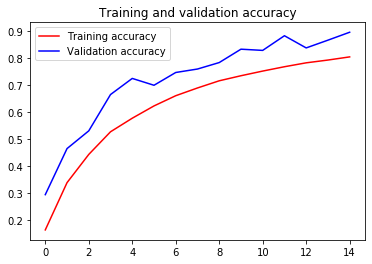

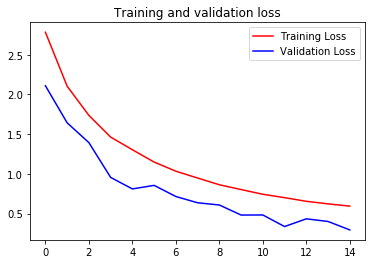

In [13]:

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Refrence**

https://www.coursera.org

https://www.tensorflow.org/

https://www.kaggle.com/datamunge/sign-language-mnist

Copyright 2020 Abhishek Gargha Maheshwarappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.